In [5]:
import pandas as pd
import numpy as np

dfzero = pd.read_csv('output/straight.csv')
dfone = pd.read_csv('output/slouch.csv')
dfzero['pose_type'] = 0
dfone['pose_type'] = 1
# dfzero.to_csv('output/straight.csv')
# dfone.to_csv('output/slouch.csv')
df = pd.concat([dfzero, dfone], ignore_index=True)
df.reset_index(drop=True, inplace=True)

In [1]:
import pandas as pd
import numpy as np
import os

# Lista plików .csv zaczynających się od "0_"
filezero = [f for f in os.listdir('5-people-csvs') if f.startswith('0_') and f.endswith('.csv')]
fileone = [f for f in os.listdir('5-people-csvs') if f.startswith('1_') and f.endswith('.csv')]

# Wczytanie plików .csv
dfzero_list = [pd.read_csv(os.path.join('5-people-csvs', f)) for f in filezero]
dfone_list = [pd.read_csv(os.path.join('5-people-csvs', f)) for f in fileone]

# Połączenie plików .csv
dfzero = pd.concat(dfzero_list, ignore_index=True)
dfone = pd.concat(dfone_list, ignore_index=True)

# przypisanie odpowiednich target values
dfzero['pose_type'] = 0
dfone['pose_type'] = 1

In [2]:
ss = [0.46357843,0.41783768,0.4145142,0.4356235,0.44074166,0.69244754,0.7241567,0.9449361,1.0116795,0.9895468,1.0035233,1.2435881,1.2543418,0.9691763,0.99773383,0.9938545,1.0617462,0.614032,0.6133709,0.58484566,0.5799686,0.51286864,0.65147066,0.4185276,0.7381544,0.33406097,0.85294336,0.45267662,0.62642026,0.48403,0.7768456,0.6491516,0.867496,0.70062435,0.6077934,0.69608736,0.5955064,0.41157913,0.7886716,0.88540393,0.7216549,0.7164442,0.21913832,0.4246785,0.020467311,0.029481202,0.009103835,0.047676474,0.020335972,0.037186414,0.0037148893]
ss = np.array(ss)
ss = ss.reshape([1, 1, 17, 3])
ss

array([[[[0.46357843, 0.41783768, 0.4145142 ],
         [0.4356235 , 0.44074166, 0.69244754],
         [0.7241567 , 0.9449361 , 1.0116795 ],
         [0.9895468 , 1.0035233 , 1.2435881 ],
         [1.2543418 , 0.9691763 , 0.99773383],
         [0.9938545 , 1.0617462 , 0.614032  ],
         [0.6133709 , 0.58484566, 0.5799686 ],
         [0.51286864, 0.65147066, 0.4185276 ],
         [0.7381544 , 0.33406097, 0.85294336],
         [0.45267662, 0.62642026, 0.48403   ],
         [0.7768456 , 0.6491516 , 0.867496  ],
         [0.70062435, 0.6077934 , 0.69608736],
         [0.5955064 , 0.41157913, 0.7886716 ],
         [0.88540393, 0.7216549 , 0.7164442 ],
         [0.21913832, 0.4246785 , 0.02046731],
         [0.0294812 , 0.00910383, 0.04767647],
         [0.02033597, 0.03718641, 0.00371489]]]])

In [12]:
rr = np.arange(0, 51)
rr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [7]:
# dfzero[0]
# dfone.isnull().sum().sum()
# dfone

sample = dfzero.sample(n=1, random_state=420)
sample.reset_index(drop=True, inplace=True)
filepath = sample.pop('filepath')
sample.pop('pose_type')

# drop dataframe index from sample df
sample = sample.to_numpy().reshape([1, 1, 17, 3])

# generate numpy array representing rgb image of dimensions 192x192
img = np.ones((192, 192, 3), dtype=np.uint8)*128

# sample.shape

# take string after sequence './input/'
filepath = filepath.values[0][8:]
img_path = os.path.join('C:/Users/kluse/Documents/python/SSR-Dataset/pictures_700K/input/0_marcin_15', filepath)
# switch path from linux to windows with os.path.join
img_path = img_path.replace('/', '\\')
img_path



'C:\\Users\\kluse\\Documents\\python\\SSR-Dataset\\pictures_700K\\input\\0_marcin_15\\0_marcin_30\\0005200.jpg'

(192, 108, 3)

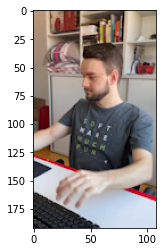

In [9]:
import cv2
# read jpg image as numpy array
img = cv2.imread(r'C:\Users\kluse\Documents\python\SSR-Dataset\pictures_700K\input\0_marcin_15\0000001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display image with pyplot
import matplotlib.pyplot as plt
plt.imshow(img)
img.shape

In [5]:
# flatten = np.hstack(
#         [keypoints_with_scores.squeeze().T.flatten()]).reshape([1, 51])

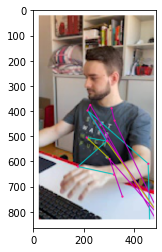

In [10]:
# print scatterplot with plt
import matplotlib.pyplot as plt
import seaborn as sns
import drawing_util as du
# sns.set_style('whitegrid')
# sns.set_palette('Set2')

skeleton = du.draw_prediction_on_image(img, ss)

# plot numpy array skeleton as image
plt.imshow(skeleton)


# plt.scatter(dfzero['pose_type'], dfzero['pose_type'])
# plt.show()

In [2]:
df.columns

Index(['filepath', 'pose_type', 'x_nose', 'x_left_eye', 'x_right_eye',
       'x_left_ear', 'x_right_ear', 'x_left_shoulder', 'x_right_shoulder',
       'x_left_elbow', 'x_right_elbow', 'x_left_wrist', 'x_right_wrist',
       'x_left_hip', 'x_right_hip', 'x_left_knee', 'x_right_knee',
       'x_left_ankle', 'x_right_ankle', 'y_nose', 'y_left_eye', 'y_right_eye',
       'y_left_ear', 'y_right_ear', 'y_left_shoulder', 'y_right_shoulder',
       'y_left_elbow', 'y_right_elbow', 'y_left_wrist', 'y_right_wrist',
       'y_left_hip', 'y_right_hip', 'y_left_knee', 'y_right_knee',
       'y_left_ankle', 'y_right_ankle', 'pred_nose', 'pred_left_eye',
       'pred_right_eye', 'pred_left_ear', 'pred_right_ear',
       'pred_left_shoulder', 'pred_right_shoulder', 'pred_left_elbow',
       'pred_right_elbow', 'pred_left_wrist', 'pred_right_wrist',
       'pred_left_hip', 'pred_right_hip', 'pred_left_knee', 'pred_right_knee',
       'pred_left_ankle', 'pred_right_ankle'],
      dtype='object')

In [2]:
x = ["x_nose","x_left_eye","x_right_eye","x_left_ear","x_right_ear","x_left_shoulder","x_right_shoulder","x_left_elbow","x_right_elbow","x_left_wrist","x_right_wrist","x_left_hip","x_right_hip","x_left_knee","x_right_knee","x_left_ankle","x_right_ankle",]
y = ["y_nose","y_left_eye","y_right_eye","y_left_ear","y_right_ear","y_left_shoulder","y_right_shoulder","y_left_elbow","y_right_elbow","y_left_wrist","y_right_wrist","y_left_hip","y_right_hip","y_left_knee","y_right_knee","y_left_ankle","y_right_ankle",]
# distance
r = ["r_nose","r_left_eye","r_right_eye","r_left_ear","r_right_ear","r_left_shoulder","r_right_shoulder","r_left_elbow","r_right_elbow","r_left_wrist","r_right_wrist","r_left_hip","r_right_hip","r_left_knee","r_right_knee","r_left_ankle","r_right_ankle",]
rnonose = ["r_left_eye","r_right_eye","r_left_ear","r_right_ear","r_left_shoulder","r_right_shoulder","r_left_elbow","r_right_elbow","r_left_wrist","r_right_wrist","r_left_hip","r_right_hip","r_left_knee","r_right_knee","r_left_ankle","r_right_ankle",]

In [3]:
xs = df.filter(like='x_')
ys = df.filter(like='y_')
# factor = df.filter(like='pred')
xnose = xs['x_nose']
ynose = ys['y_nose']
xs = xs.drop(columns=['x_nose'])
ys = ys.drop(columns=['y_nose'])

# []*16 to match the dimension of xs frame
df[rnonose] = (((np.array([xnose.values]*16) - xs.values.T)**2 + 
                (np.array([ynose.values]*16) - ys.values.T)**2)**.5).T

In [4]:
# for i in df.columns:
#     print (i)

df[["filepath","pose_type","x_nose","x_left_eye","x_right_eye","x_left_ear","x_right_ear","x_left_shoulder","x_right_shoulder","x_left_elbow","x_right_elbow","x_left_wrist","x_right_wrist","x_left_hip","x_right_hip","x_left_knee","x_right_knee","x_left_ankle","x_right_ankle","y_nose","y_left_eye","y_right_eye","y_left_ear","y_right_ear","y_left_shoulder","y_right_shoulder","y_left_elbow","y_right_elbow","y_left_wrist","y_right_wrist","y_left_hip","y_right_hip","y_left_knee","y_right_knee","y_left_ankle","y_right_ankle","pred_nose","pred_left_eye","pred_right_eye","pred_left_ear","pred_right_ear","pred_left_shoulder","pred_right_shoulder","pred_left_elbow","pred_right_elbow","pred_left_wrist","pred_right_wrist","pred_left_hip","pred_right_hip","pred_left_knee","pred_right_knee","pred_left_ankle","pred_right_ankle",         
]].to_csv('ds/coords.csv', index=False)

df[["filepath","pose_type","x_nose","y_nose","pred_nose","pred_left_eye","pred_right_eye","pred_left_ear","pred_right_ear","pred_left_shoulder","pred_right_shoulder","pred_left_elbow","pred_right_elbow","pred_left_wrist","pred_right_wrist","pred_left_hip","pred_right_hip","pred_left_knee","pred_right_knee","pred_left_ankle","pred_right_ankle","r_left_eye","r_right_eye","r_left_ear","r_right_ear","r_left_shoulder","r_right_shoulder","r_left_elbow","r_right_elbow","r_left_wrist","r_right_wrist","r_left_hip","r_right_hip","r_left_knee","r_right_knee","r_left_ankle","r_right_ankle",
]].to_csv('ds/distance.csv', index=False)

In [5]:
import pandas as pd
import save_utils as su
import math
import seaborn as sns
import numpy as np

df1 = pd.read_csv('ds/coords.csv')
df2 = pd.read_csv('ds/distance.csv')


In [6]:
df2

,filepath,pose_type,x_nose,y_nose,pred_nose,pred_left_eye,pred_right_eye,pred_left_ear,pred_right_ear,pred_left_shoulder,...,r_left_elbow,r_right_elbow,r_left_wrist,r_right_wrist,r_left_hip,r_right_hip,r_left_knee,r_right_knee,r_left_ankle,r_right_ankle
0,input/1_straight/0000049.jpg,0,0.435762,0.617509,0.610878,0.755224,0.413579,0.416439,0.752179,0.876811,...,0.524958,0.643362,0.608066,0.587692,0.824204,0.832929,0.562254,0.553509,0.811167,0.627092
1,input/1_straight/0000090.jpg,0,0.433892,0.570847,0.688660,0.656384,0.565551,0.628252,0.815375,0.834288,...,0.535876,0.613138,0.625940,0.581121,0.796379,0.812193,0.579461,0.530022,0.633938,0.618618
2,input/1_straight/0000190.jpg,0,0.426224,0.549939,0.608461,0.654856,0.658116,0.775197,0.806774,0.852523,...,0.565870,0.600946,0.638813,0.589399,0.815979,0.805795,0.599521,0.539984,0.658469,0.616137
3,input/1_straight/0000015.jpg,0,0.460349,0.560135,0.446158,0.600358,0.784931,0.707908,0.813879,0.836672,...,0.511445,0.583620,0.607898,0.558900,0.772197,0.768740,0.559458,0.517265,0.618436,0.557349
4,input/1_straight/0000479.jpg,0,0.471483,0.589907,0.561213,0.728372,0.546257,0.555770,0.599870,0.709840,...,0.509079,0.601368,0.559732,0.555755,0.758507,0.807026,0.529868,0.517217,0.572622,0.573424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,input/0_slouch/0000378.jpg,1,0.423976,0.670666,0.609490,0.725031,0.810435,0.335111,0.492373,0.886982,...,0.554971,0.633344,0.610793,0.612450,0.813985,0.771583,0.583915,0.544945,0.642726,0.718423
1842,input/0_slouch/0000104.jpg,1,0.547368,0.609751,0.630734,0.415756,0.643679,0.514878,0.673377,0.674743,...,0.435030,0.505079,0.519416,0.476955,0.648941,0.673479,0.461670,0.433104,0.530808,0.451583
1843,input/0_slouch/0000419.jpg,1,0.534459,0.535076,0.562676,0.724187,0.793502,0.515398,0.544853,0.812038,...,0.454270,0.510935,0.542503,0.501385,0.691674,0.707589,0.490834,0.459663,0.558955,0.472536
1844,input/0_slouch/0000563.jpg,1,0.495910,0.596528,0.558232,0.810395,0.536751,0.549935,0.689545,0.582410,...,0.492909,0.565553,0.563388,0.541327,0.723900,0.700982,0.515673,0.478030,0.582485,0.514862


In [7]:
import itertools
models = ["model1", "model2", "model3"]
model_names = ['model_throttle','model_1_layer_128','model_128_relu']
csvnames = ["coords", 'distance']



list(itertools.product(zip(models, model_names), csvnames))

[(('model1', 'model_throttle'), 'coords'),
 (('model1', 'model_throttle'), 'distance'),
 (('model2', 'model_1_layer_128'), 'coords'),
 (('model2', 'model_1_layer_128'), 'distance'),
 (('model3', 'model_128_relu'), 'coords'),
 (('model3', 'model_128_relu'), 'distance')]